<a href="https://colab.research.google.com/github/seunghee-lee/Portfolio/blob/main/Financial_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Kospi 자료 수집 및 분석

In [31]:
!pip install -U finance-datareader
!pip install pandas-datareader
!pip install yfinance

In [32]:
!pip install --upgrade yfinance

In [33]:
import FinanceDataReader as fdr
import yfinance as yf
import seaborn as sns
import math
import pandas_datareader as pdr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
from datetime import datetime

In [34]:
# Set the start and end date
start_date = '2000-01-01'
end_date = '2025-05-01'

In [35]:
# 주가 데이터를 불러옴
# (yahoo finance open API, 공식적으로 없어졌지만, 비공식적으로 서비스는 제공되고 있음)

# Get the data
data1 = yf.download('^KS11', start_date, end_date)

[*********************100%***********************]  1 of 1 completed


In [36]:
# Print 5 rows
data1.tail()

Price,Close,High,Low,Open,Volume
Ticker,^KS11,^KS11,^KS11,^KS11,^KS11
Date,,,,,
2025-04-24,2522.330078,2530.610107,2507.209961,2525.340088,327900
2025-04-25,2546.300049,2553.330078,2534.939941,2544.590088,403500
2025-04-28,2548.860107,2558.689941,2541.969971,2551.229980,454100
2025-04-29,2565.419922,2571.409912,2542.250000,2550.250000,547100
2025-04-30,2556.610107,2570.830078,2544.459961,2561.040039,487500


In [37]:
data2 = fdr.DataReader('ks11', '2000')  #investing.com에서 코드를 확인하고 입력
data2.tail()

,Open,High,Low,Close,Volume,Change,UpDown,Comp,Amount,MarCap
Date,,,,,,,,,,
2025-04-29,2550.25,2571.41,2542.25,2565.42,547081468,0.0065,1,16.56,9215174352275,2.100882e+15
2025-04-30,2561.04,2570.83,2544.46,2556.61,487488833,-0.0034,2,-8.81,8435602446234,2.094129e+15
2025-05-02,2556.52,2567.04,2540.57,2559.79,585492284,0.0012,1,3.18,8327449263431,2.095822e+15
2025-05-07,2577.04,2581.85,2559.17,2573.80,546755132,0.0055,1,14.01,8935449197459,2.106865e+15
2025-05-08,2581.27,2590.90,2575.78,2579.48,471635814,0.0022,1,5.68,10270131237563,2.111360e+15


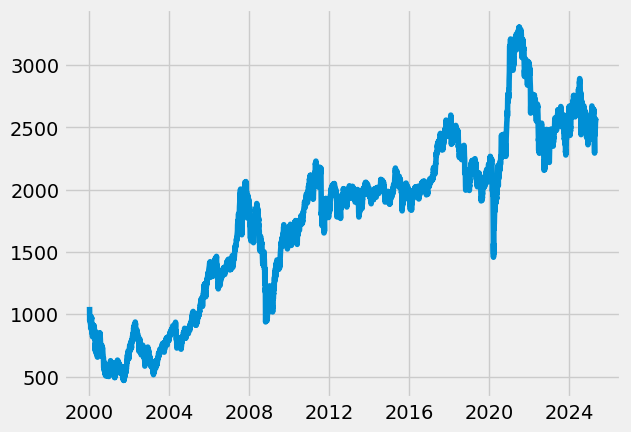

In [38]:
datag1=data1[['Close']]
plt.plot(datag1)

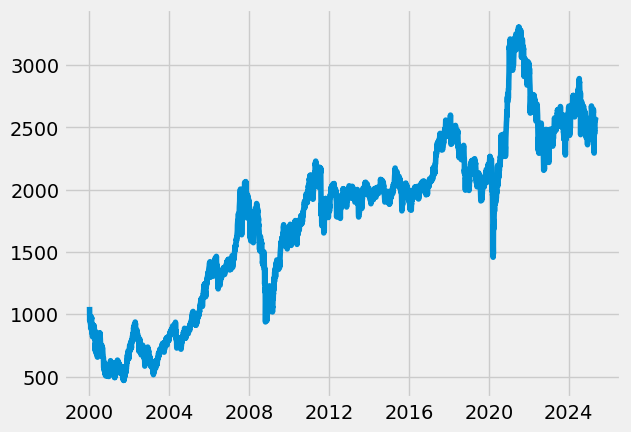

In [39]:
datag2=data2[['Close']]
plt.plot(datag2)

In [40]:
Kospi=data1

In [41]:
Kospi['Return']=np.log(Kospi['Close']/Kospi['Close'].shift(1))

In [42]:
Kospi.tail()

Price,Close,High,Low,Open,Volume,Return
Ticker,^KS11,^KS11,^KS11,^KS11,^KS11,
Date,,,,,,
2025-04-24,2522.330078,2530.610107,2507.209961,2525.340088,327900,-0.001280
2025-04-25,2546.300049,2553.330078,2534.939941,2544.590088,403500,0.009458
2025-04-28,2548.860107,2558.689941,2541.969971,2551.229980,454100,0.001005
2025-04-29,2565.419922,2571.409912,2542.250000,2550.250000,547100,0.006476
2025-04-30,2556.610107,2570.830078,2544.459961,2561.040039,487500,-0.003440


In [43]:
Kospi.head()

Price,Close,High,Low,Open,Volume,Return
Ticker,^KS11,^KS11,^KS11,^KS11,^KS11,
Date,,,,,,
2000-01-04,1059.040039,1066.180054,1016.590027,1028.329956,195900,NaN
2000-01-05,986.309998,1026.520020,984.049988,1006.869995,257700,-0.071147
2000-01-06,960.789978,1014.900024,953.500000,1013.950012,203500,-0.026215
2000-01-07,948.650024,970.159973,930.840027,949.169983,215700,-0.012716
2000-01-10,987.239990,994.940002,974.820007,979.669983,240200,0.039873


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

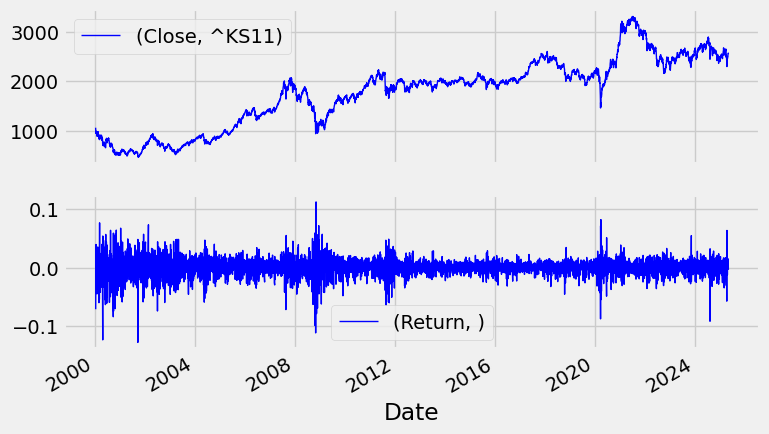

In [44]:
Kospi[['Close','Return']].plot(subplots=True, style='b', lw='1', figsize=(8,5))

In [45]:
Kospi['40d']=Kospi['Close'].rolling(window=40).mean()
Kospi['240d']=Kospi['Close'].rolling(window=240).mean()

In [46]:
Kospi[['Close', '40d', '240d']].tail()

Price,Close,40d,240d
Ticker,^KS11,,
Date,,,
2025-04-24,2522.330078,2526.119232,2602.609371
2025-04-25,2546.300049,2524.232983,2602.021288
2025-04-28,2548.860107,2524.634985,2601.424622
2025-04-29,2565.419922,2525.547485,2600.931997
2025-04-30,2556.610107,2525.509491,2600.431914


<Axes: xlabel='Date'>

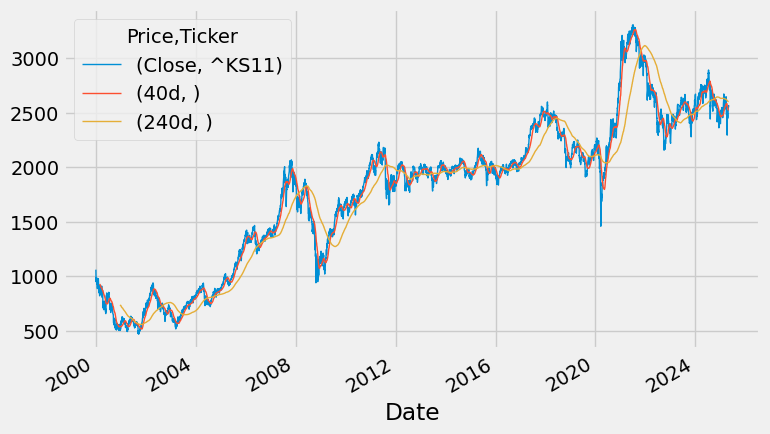

In [47]:
Kospi[['Close', '40d', '240d']].plot(lw='1', figsize=(8,5))

In [48]:
Kospi['Mov_vol']=Kospi['Return'].rolling(window=245).std()*math.sqrt(245)

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>], dtype=object)

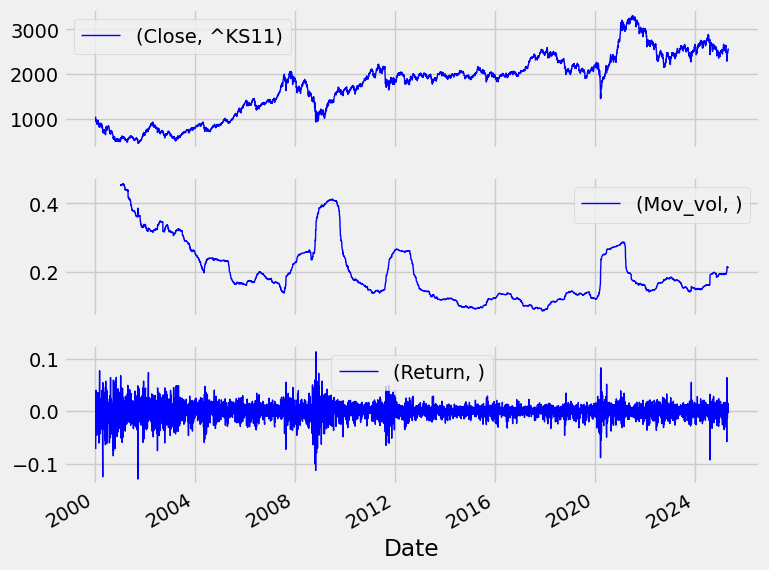

In [49]:
Kospi[['Close','Mov_vol', 'Return']].plot(subplots=True, style='b', lw='1', figsize=(8,7))

#### 주요 주가지수 분석

In [50]:
kospi = yf.download('^KS11', start_date, end_date)
snp = yf.download('^GSPC',start_date, end_date) #S&P500
nikkei = yf.download('^N225',start_date, end_date) # Nikkei 225
euronext = yf.download('^N100',start_date, end_date) # EURONEXT 100

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [51]:
snp.head()

Price,Close,High,Low,Open,Volume
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
Date,,,,,
2000-01-03,1455.219971,1478.000000,1438.359985,1469.250000,931800000
2000-01-04,1399.420044,1455.219971,1397.430054,1455.219971,1009000000
2000-01-05,1402.109985,1413.270020,1377.680054,1399.420044,1085500000
2000-01-06,1403.449951,1411.900024,1392.099976,1402.109985,1092300000
2000-01-07,1441.469971,1441.469971,1400.729980,1403.449951,1225200000


In [52]:
# 지수 자료를 병합
eqt1 = pd.merge(snp['Close'], kospi['Close'],left_index=True, right_index=True, how='inner')
eqt1.columns=['SP500','KOSPI']

eqt2 = pd.merge(nikkei['Close'], euronext['Close'],left_index=True, right_index=True, how='inner')
eqt2.columns=['Nikkei','Euronext']

eqt3 = pd.merge(eqt1, eqt2,left_index=True, right_index=True, how='inner')

In [53]:
eqt3.head()

,SP500,KOSPI,Nikkei,Euronext
Date,,,,
2000-01-04,1399.420044,1059.040039,19002.859375,955.969971
2000-01-05,1402.109985,986.309998,18542.550781,930.260010
2000-01-06,1403.449951,960.789978,18168.269531,922.460022
2000-01-07,1441.469971,948.650024,18193.410156,943.880005
2000-01-11,1438.560059,981.330017,18850.919922,954.059998


In [54]:
rtn= ( np.log(eqt3) - np.log(eqt3.shift(1)) )*100
rtn.columns=['r_sp','r_kp','r_nk','r_ux']
rtn.head()

,r_sp,r_kp,r_nk,r_ux
Date,,,,
2000-01-04,NaN,NaN,NaN,NaN
2000-01-05,0.192034,-7.114745,-2.452133,-2.726237
2000-01-06,0.095522,-2.621486,-2.039149,-0.842009
2000-01-07,2.672995,-1.271589,0.138281,2.295501
2000-01-11,-0.202075,3.386886,3.550227,1.072752


In [55]:
eqt = pd.merge(eqt3,rtn,left_index=True, right_index=True, how='inner')
eqt.head()

,SP500,KOSPI,Nikkei,Euronext,r_sp,r_kp,r_nk,r_ux
Date,,,,,,,,
2000-01-04,1399.420044,1059.040039,19002.859375,955.969971,NaN,NaN,NaN,NaN
2000-01-05,1402.109985,986.309998,18542.550781,930.260010,0.192034,-7.114745,-2.452133,-2.726237
2000-01-06,1403.449951,960.789978,18168.269531,922.460022,0.095522,-2.621486,-2.039149,-0.842009
2000-01-07,1441.469971,948.650024,18193.410156,943.880005,2.672995,-1.271589,0.138281,2.295501
2000-01-11,1438.560059,981.330017,18850.919922,954.059998,-0.202075,3.386886,3.550227,1.072752


In [56]:
pr = eqt[['SP500', 'KOSPI', 'Nikkei','Euronext']]
pr.head()

,SP500,KOSPI,Nikkei,Euronext
Date,,,,
2000-01-04,1399.420044,1059.040039,19002.859375,955.969971
2000-01-05,1402.109985,986.309998,18542.550781,930.260010
2000-01-06,1403.449951,960.789978,18168.269531,922.460022
2000-01-07,1441.469971,948.650024,18193.410156,943.880005
2000-01-11,1438.560059,981.330017,18850.919922,954.059998


In [57]:
rt = eqt[['r_sp','r_kp','r_nk','r_ux']]
rt.head()

,r_sp,r_kp,r_nk,r_ux
Date,,,,
2000-01-04,NaN,NaN,NaN,NaN
2000-01-05,0.192034,-7.114745,-2.452133,-2.726237
2000-01-06,0.095522,-2.621486,-2.039149,-0.842009
2000-01-07,2.672995,-1.271589,0.138281,2.295501
2000-01-11,-0.202075,3.386886,3.550227,1.072752


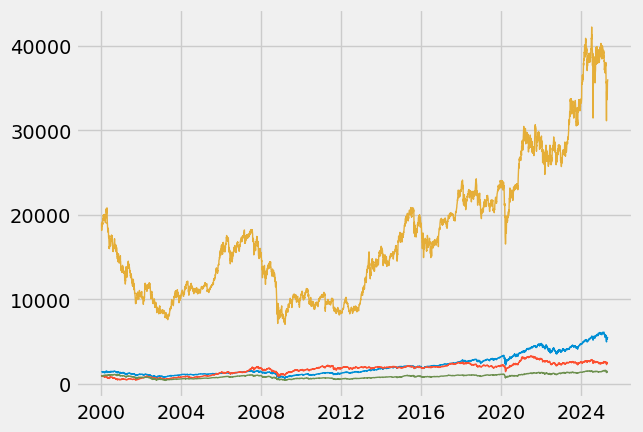

In [58]:
# 원 자료로 그림을 그려 봄
plt.plot(pr, lw='1')

In [59]:
# 초기시점을 0 으로 기준으로 잡고 상대 주가(relative stock price)를 표현
pr_0 = pr / pr.iloc[0] - 1.0

<Axes: xlabel='Date'>

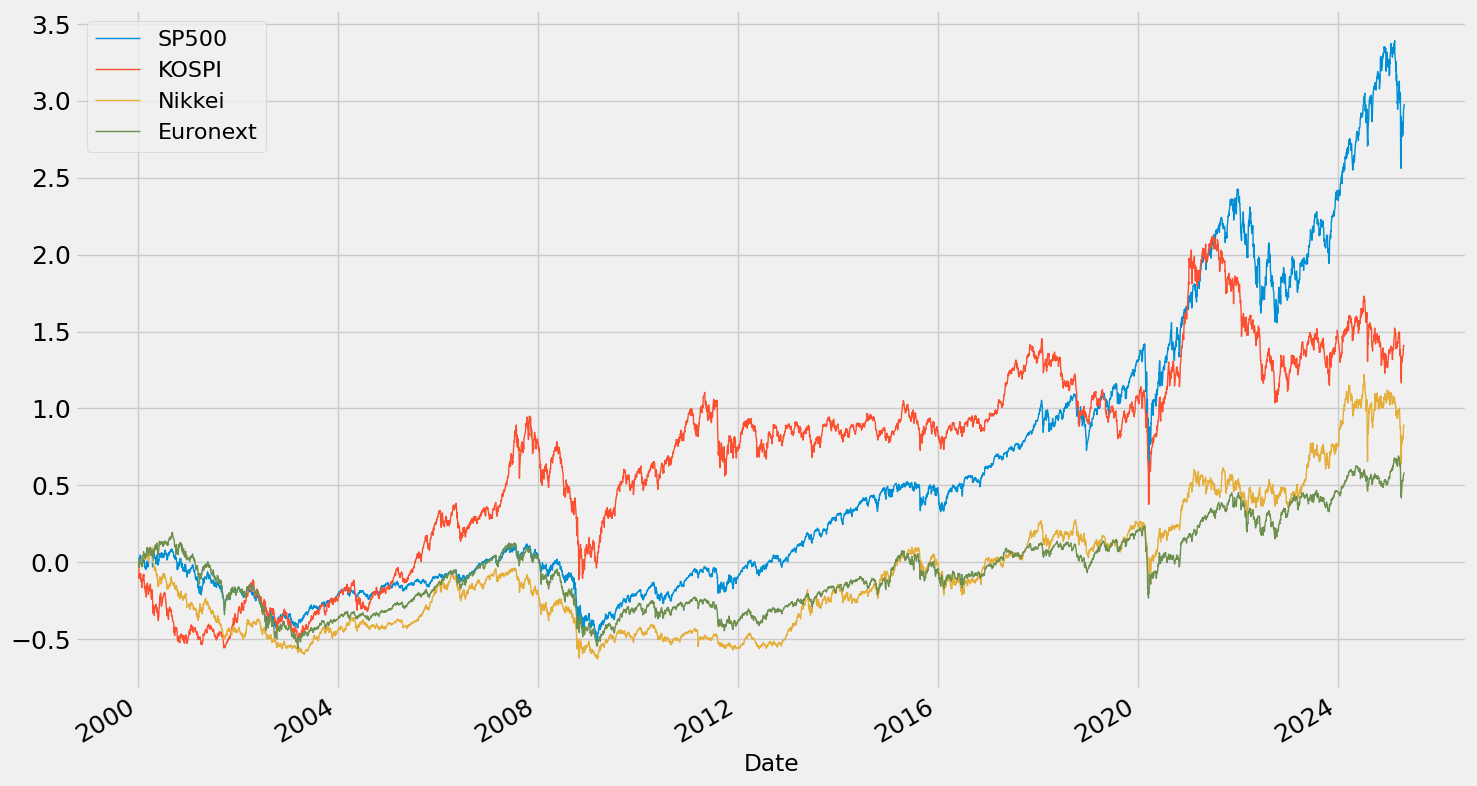

In [60]:
# 상대가격을 그래프로 표현
plt.rcParams['legend.fontsize'] = 16
pr_0.plot( figsize=(16,10), fontsize=18, lw='1')

<Axes: xlabel='Date'>

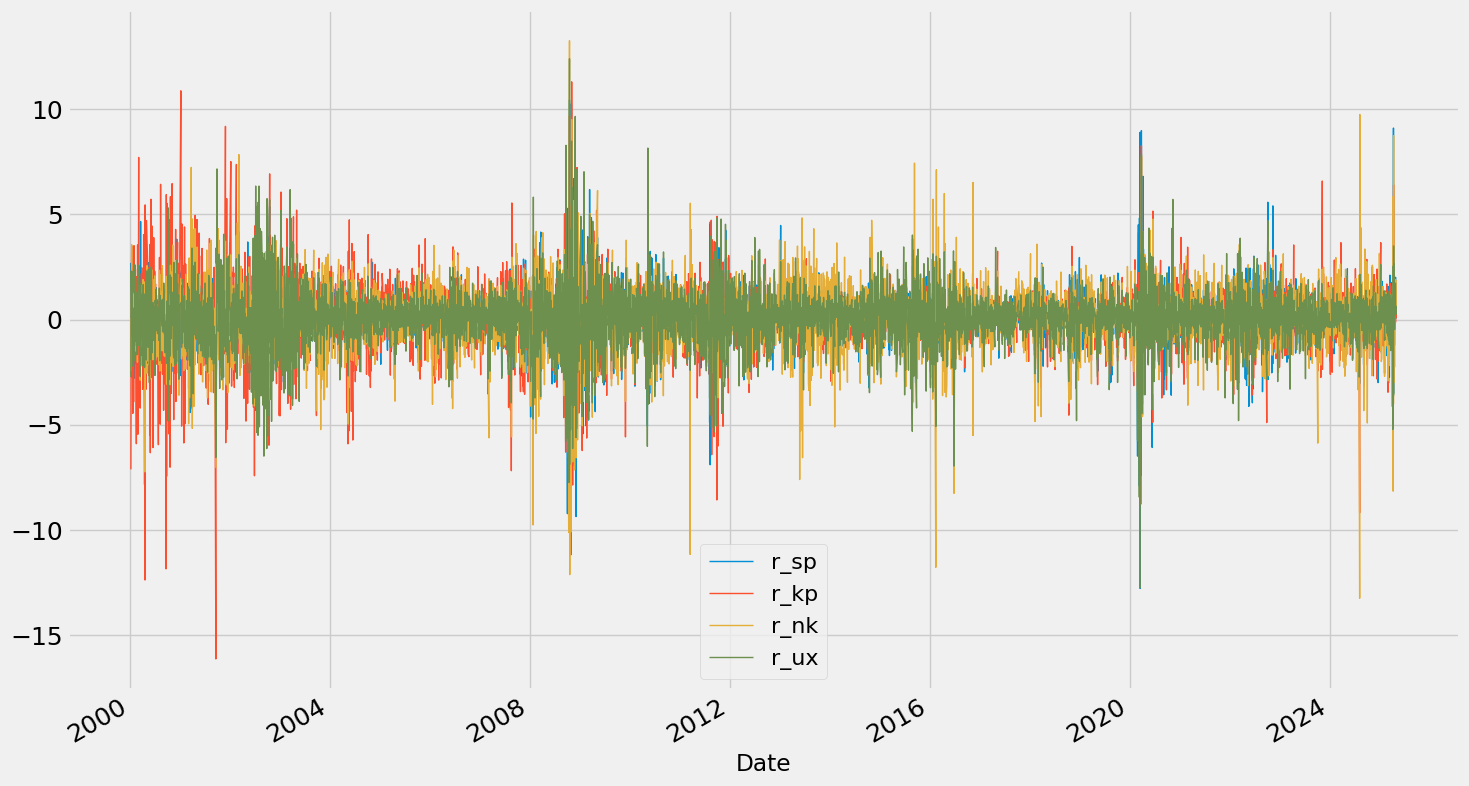

In [61]:
#  수익률 그래프도 표현
plt.rcParams['legend.fontsize'] = 16
rt.plot( figsize=(16,10), lw='1', fontsize=18)

In [62]:
pr.describe()

,SP500,KOSPI,Nikkei,Euronext
count,5683.000000,5683.000000,5683.000000,5683.000000
mean,2151.543614,1769.561775,17520.547518,903.577818
std,1297.865790,684.810411,7943.310743,259.439998
min,676.530029,468.760010,7054.979980,419.950012
25%,1203.119995,1234.040039,10837.089844,689.690002
50%,1498.109985,1936.189941,15889.330078,874.659973
75%,2790.095093,2205.914917,21759.100586,1049.989990
max,6144.149902,3305.209961,42224.019531,1617.060059


In [63]:
rt.describe()

,r_sp,r_kp,r_nk,r_ux
count,5682.000000,5682.000000,5682.000000,5682.000000
mean,0.024308,0.015511,0.011267,0.008095
std,1.290048,1.527914,1.544206,1.348241
min,-12.765220,-16.115370,-13.234076,-12.751740
25%,-0.495816,-0.638294,-0.734643,-0.598731
50%,0.070393,0.070484,0.052886,0.060834
75%,0.614028,0.761558,0.834390,0.663516
max,10.423562,11.284352,13.234592,12.378520


In [64]:
print(rt.describe())
print('skeness: ', rt.skew(axis=0))
print('kurtosis: ', rt.kurtosis(axis=0))

              r_sp         r_kp         r_nk         r_ux
count  5682.000000  5682.000000  5682.000000  5682.000000
mean      0.024308     0.015511     0.011267     0.008095
std       1.290048     1.527914     1.544206     1.348241
min     -12.765220   -16.115370   -13.234076   -12.751740
25%      -0.495816    -0.638294    -0.734643    -0.598731
50%       0.070393     0.070484     0.052886     0.060834
75%       0.614028     0.761558     0.834390     0.663516
max      10.423562    11.284352    13.234592    12.378520
skeness:  r_sp   -0.402940
r_kp   -0.595606
r_nk   -0.473094
r_ux   -0.150932
dtype: float64
kurtosis:  r_sp    9.989088
r_kp    9.040639
r_nk    7.352799
r_ux    7.369696
dtype: float64


In [65]:
# 우리가 원하는 통계량이 모두 포함된 기초통계표를 만들음
df=pr
stats = df.describe()
stats.loc['var'] = df.var().tolist()
stats.loc['skew'] = df.skew().tolist()
stats.loc['kurt'] = df.kurtosis().tolist()
print(stats)

              SP500          KOSPI        Nikkei      Euronext
count  5.683000e+03    5683.000000  5.683000e+03   5683.000000
mean   2.151544e+03    1769.561775  1.752055e+04    903.577818
std    1.297866e+03     684.810411  7.943311e+03    259.439998
min    6.765300e+02     468.760010  7.054980e+03    419.950012
25%    1.203120e+03    1234.040039  1.083709e+04    689.690002
50%    1.498110e+03    1936.189941  1.588933e+04    874.659973
75%    2.790095e+03    2205.914917  2.175910e+04   1049.989990
max    6.144150e+03    3305.209961  4.222402e+04   1617.060059
var    1.684456e+06  468965.299685  6.309619e+07  67309.112565
skew   1.236190e+00      -0.218036  1.008650e+00      0.563080
kurt   5.228698e-01      -0.775938  3.739815e-01     -0.349559


In [66]:
df=rt
stats = df.describe()
stats.loc['var'] = df.var().tolist()
stats.loc['skew'] = df.skew().tolist()
stats.loc['kurt'] = df.kurtosis().tolist()
print(stats)

              r_sp         r_kp         r_nk         r_ux
count  5682.000000  5682.000000  5682.000000  5682.000000
mean      0.024308     0.015511     0.011267     0.008095
std       1.290048     1.527914     1.544206     1.348241
min     -12.765220   -16.115370   -13.234076   -12.751740
25%      -0.495816    -0.638294    -0.734643    -0.598731
50%       0.070393     0.070484     0.052886     0.060834
75%       0.614028     0.761558     0.834390     0.663516
max      10.423562    11.284352    13.234592    12.378520
var       1.664223     2.334522     2.384572     1.817753
skew     -0.402940    -0.595606    -0.473094    -0.150932
kurt      9.989088     9.040639     7.352799     7.369696


In [67]:
pr.corr()

,SP500,KOSPI,Nikkei,Euronext
SP500,1.000000,0.778980,0.963483,0.904811
KOSPI,0.778980,1.000000,0.714611,0.659331
Nikkei,0.963483,0.714611,1.000000,0.955930
Euronext,0.904811,0.659331,0.955930,1.000000


In [68]:
rt.corr()

,r_sp,r_kp,r_nk,r_ux
r_sp,1.000000,0.227922,0.197615,0.593374
r_kp,0.227922,1.000000,0.612255,0.377166
r_nk,0.197615,0.612255,1.000000,0.400975
r_ux,0.593374,0.377166,0.400975,1.000000


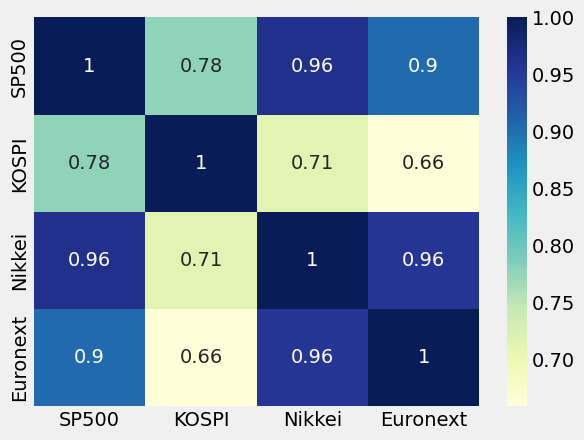

In [69]:
sns.heatmap(pr.corr(), annot=True, cmap="YlGnBu")
plt.show()

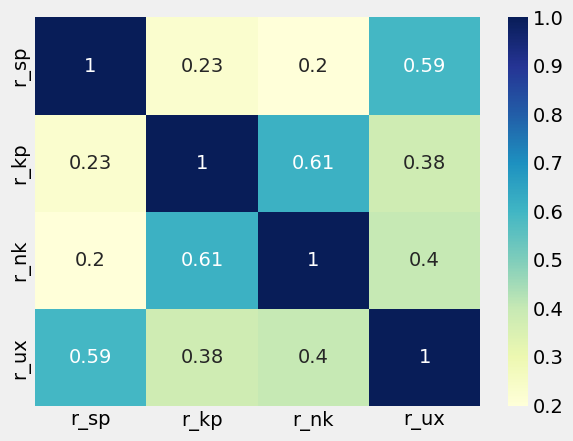

In [70]:
sns.heatmap(rt.corr(), annot=True, cmap="YlGnBu")
plt.show()

#### 회귀 분석

In [71]:
snp = yf.download('^GSPC',start_date, end_date) #S&P500 지수
vix = yf.download('^vix',start_date, end_date) #VIX 지수

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [72]:
data = pd.merge(snp['Close'], vix['Close'],left_index=True, right_index=True, how='inner')
data.columns=['SP500','VIX']

In [73]:
data.tail()

,SP500,VIX
Date,,
2025-04-24,5484.770020,26.469999
2025-04-25,5525.209961,24.840000
2025-04-28,5528.750000,25.150000
2025-04-29,5560.830078,24.170000
2025-04-30,5569.060059,24.700001


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

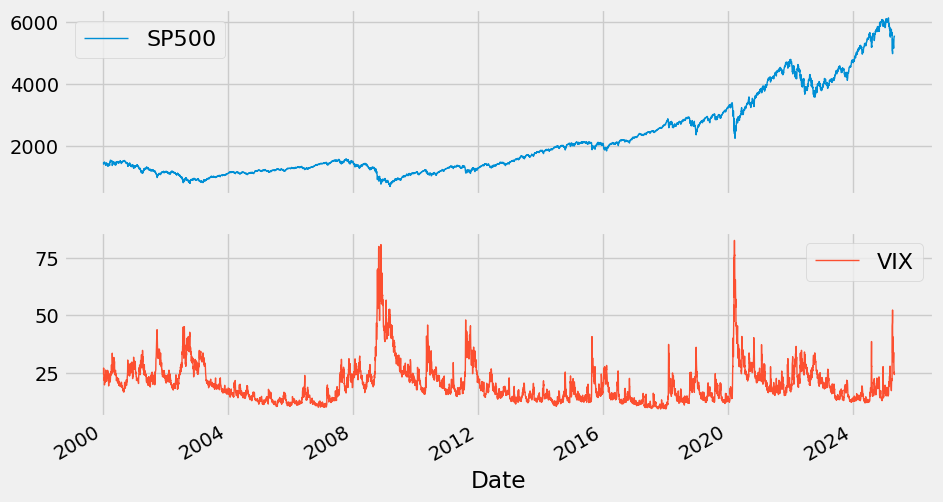

In [74]:
data.plot(subplots=True, figsize=(10, 6), lw='1')

<Axes: xlabel='Date'>

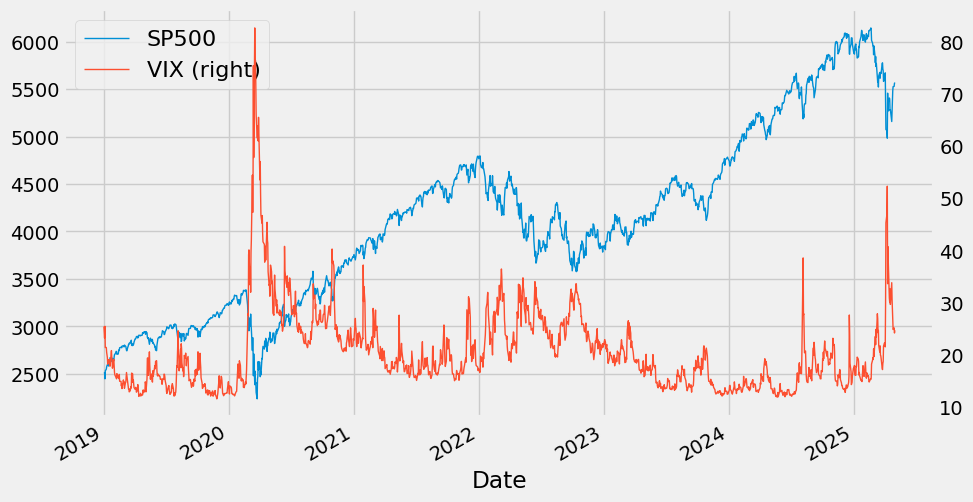

In [75]:
data.loc['2018-12-31':].plot(secondary_y='VIX', figsize=(10, 6), lw='1')

In [76]:
rets = np.log(data / data.shift(1))

In [77]:
rets.head()

,SP500,VIX
Date,,
2000-01-03,NaN,NaN
2000-01-04,-0.039099,0.109441
2000-01-05,0.001920,-0.022464
2000-01-06,0.000955,-0.026085
2000-01-07,0.026730,-0.169424


In [78]:
rets.dropna(inplace=True)

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

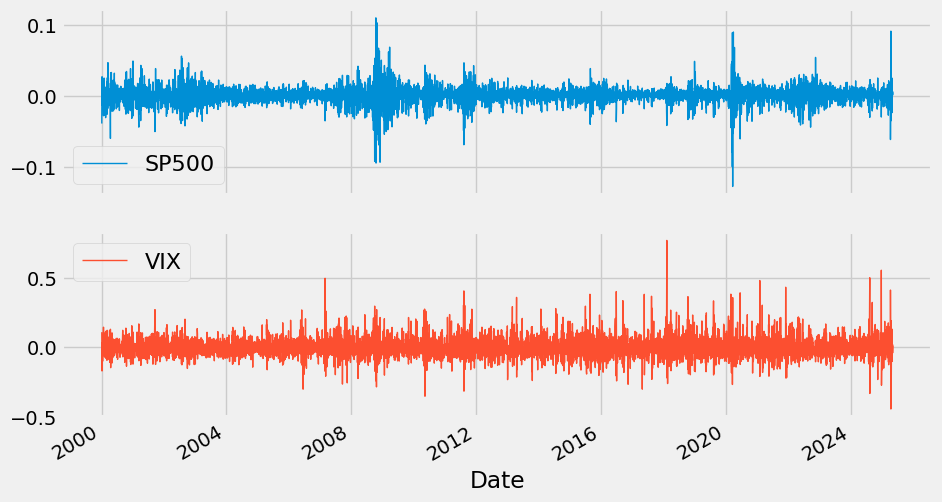

In [79]:
rets.plot(subplots=True, figsize=(10, 6), lw='1')

array([[<Axes: xlabel='SP500', ylabel='SP500'>,
        <Axes: xlabel='VIX', ylabel='SP500'>],
       [<Axes: xlabel='SP500', ylabel='VIX'>,
        <Axes: xlabel='VIX', ylabel='VIX'>]], dtype=object)

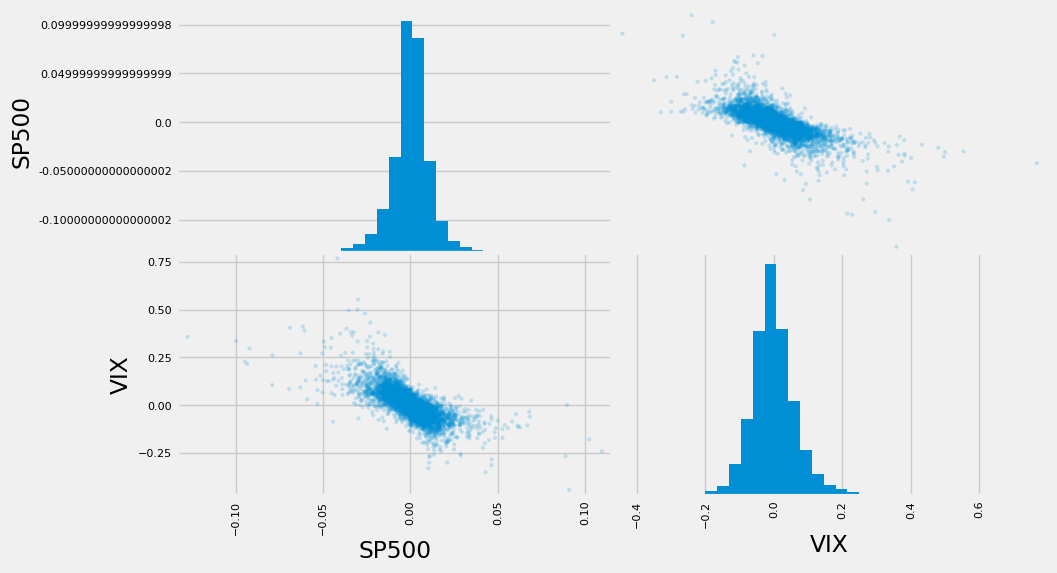

In [80]:
pd.plotting.scatter_matrix(rets,
                           alpha=0.2,
                           diagonal='hist',
                           hist_kwds={'bins': 35},
                           figsize=(10, 6))

In [81]:
reg = np.polyfit(rets['SP500'], rets['VIX'], deg=1)

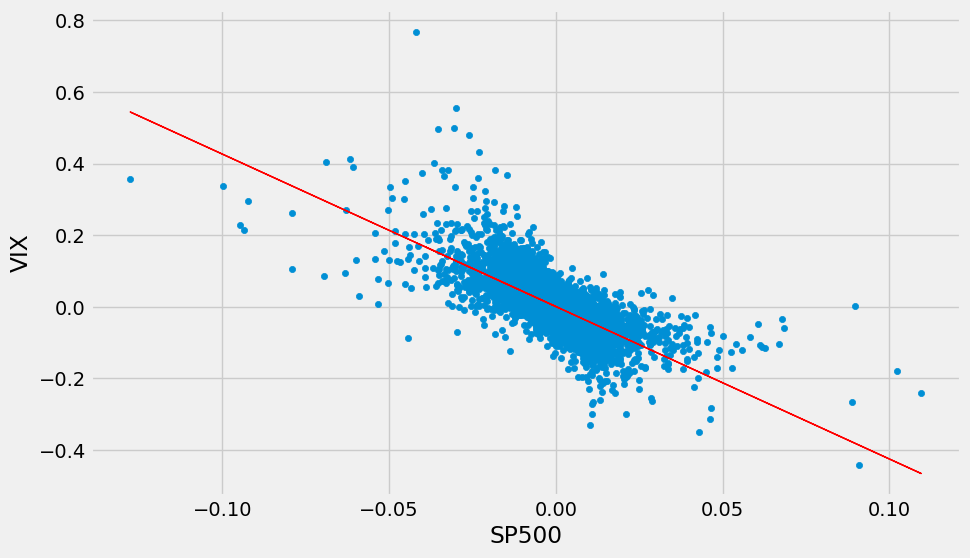

In [82]:
ax = rets.plot(kind='scatter', x='SP500', y='VIX', figsize=(10, 6))
ax.plot(rets['SP500'], np.polyval(reg, rets['SP500']), 'r', lw='1')

In [83]:
rets.corr()

,SP500,VIX
SP500,1.000000,-0.731666
VIX,-0.731666,1.000000


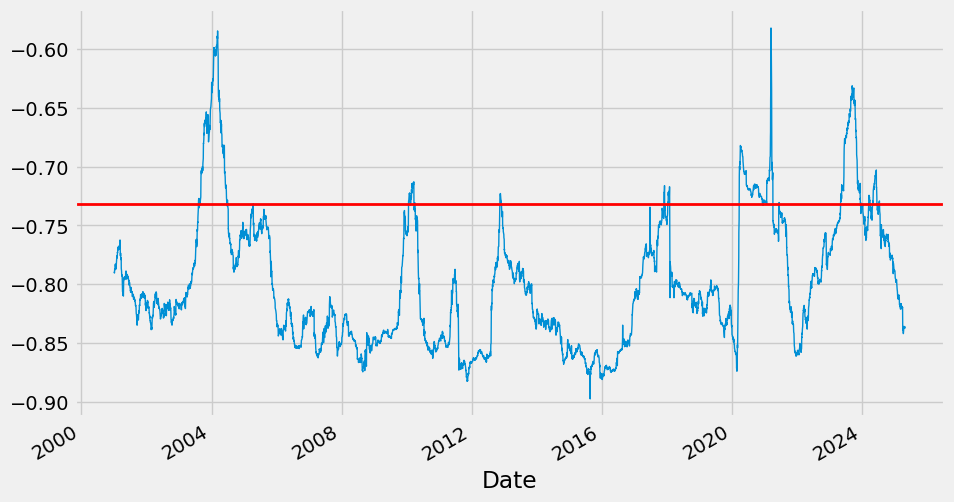

In [84]:
ax = rets['SP500'].rolling(window=252).corr(
                  rets['VIX']).plot(figsize=(10, 6), lw='1')
ax.axhline(rets.corr().iloc[0, 1], c='r', lw='2')